In [1]:
%matplotlib inline
import numpy as np
from lmfit import Parameters, Minimizer
from astropy.io import fits

import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

from ctisim.fitting import SimpleModel, SimulatedModel
from ctisim import ITL_AMP_GEOM

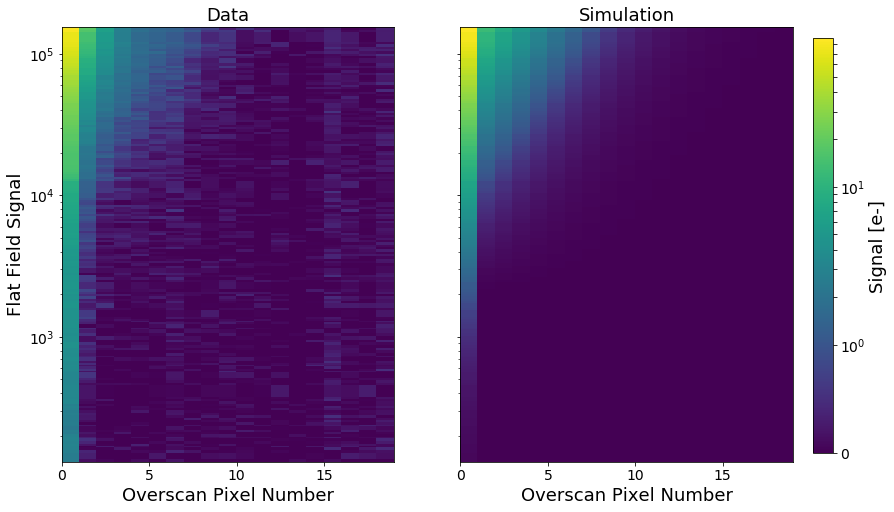

In [2]:
infile = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6790D_linearity/R20/S02/R20_S02_overscan_results.fits'
hdulist = fits.open(infile)
max_signal = 160000.
read_noise = 7.2

start = 1
stop = 20

amp = 9

## Signals
all_signals = hdulist[amp].data['FLATFIELD_SIGNAL']
signals = all_signals[all_signals<max_signal]

## Data
data = hdulist[amp].data['COLUMN_MEAN'][all_signals<max_signal, start:stop+1]

## Simulation
params = Parameters()
params.add('ctiexp', value=-6, min=-7, max=-5)
params.add('trapsize', value=0.0, min=0)
params.add('scaling', value=0.08, min=0, max=1.0)
params.add('emissiontime', value=0.4, min=0.1, max=1.0)
params.add('driftscale', value=0.0002, min=0., max=0.001)
params.add('decaytime', value=2.4, min=0.1, max=4.0)
params.add('threshold', value=2000.0, min=0.0, max=150000.)

start, stop = 1, 20
num_transfers = 512

res = SimpleModel.model_results(params, signals, num_transfers, start=start, stop=stop)

## Setting up PColor plot
vmin = 0.0
vmax = np.max(data)
y=signals
x=np.arange(data.shape[1])
X,Y=np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
im0 = axes[0].pcolor(X, Y, data, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
im1 = axes[1].pcolor(X, Y, res, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
axes[0].set_yscale('log')
axes[0].set_ylabel('Flat Field Signal', fontsize=18)
axes[0].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_title('Data', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[1].set_title('Simulation', fontsize=18)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.14, 0.02, 0.72])
cbar= fig.colorbar(im0, cax=cbar_ax)
cbar.set_label('Signal [e-]', fontsize=18)
cbar.ax.tick_params(labelsize=14)

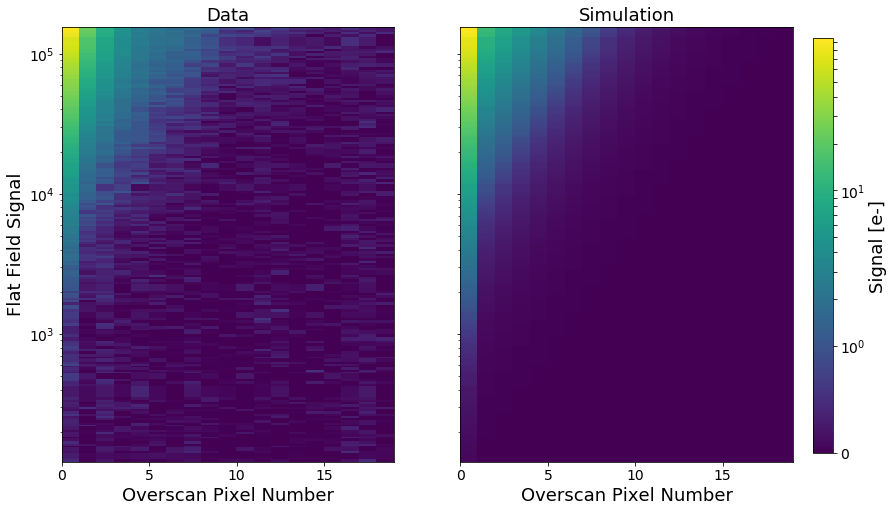

In [8]:
infile = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6790D_linearity/R20/S02/R20_S02_overscan_results.fits'
hdulist = fits.open(infile)
max_signal = 160000.
read_noise = 7.2

amp = 2
start = 1
stop = 20

## Signals
all_signals = hdulist[amp].data['FLATFIELD_SIGNAL']
signals = all_signals[all_signals<max_signal]

## Data
data = hdulist[amp].data['COLUMN_MEAN'][all_signals<max_signal, start:stop+1]

## Simulation
params = Parameters()
params.add('ctiexp', value=-6, min=-7, max=-5)
params.add('trapsize', value=4.0, min=0, max=10.0)
params.add('scaling', value=0.08, min=0, max=1.0)
params.add('emissiontime', value=0.4, min=0.1, max=1.0)
params.add('driftscale', value=0.0002, min=0., max=0.001)
params.add('decaytime', value=2.4, min=0.1, max=4.0)
params.add('threshold', value=2000.0, min=0.0, max=150000.)

res = SimulatedModel.model_results(params, signals, num_transfers, ITL_AMP_GEOM, start=start, stop=stop, trap_type=None)

## Setting up PColor plot
vmin = 0.0
vmax = np.max(data)
y=signals
x=np.arange(data.shape[1])
X,Y=np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
im0 = axes[0].pcolor(X, Y, data, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
im1 = axes[1].pcolor(X, Y, res, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
axes[0].set_yscale('log')
axes[0].set_ylabel('Flat Field Signal', fontsize=18)
axes[0].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_title('Data', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[1].set_title('Simulation', fontsize=18)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.14, 0.02, 0.72])
cbar= fig.colorbar(im0, cax=cbar_ax)
cbar.set_label('Signal [e-]', fontsize=18)
cbar.ax.tick_params(labelsize=14)

# Testing LMFit Usage

Parameters([('ctiexp', <Parameter 'ctiexp', value=-5.000032816895831 +/- 8.36, bounds=[-7:-5]>), ('trapsize', <Parameter 'trapsize', value=0.0 (fixed), bounds=[0.0:10.0]>), ('scaling', <Parameter 'scaling', value=0.08 (fixed), bounds=[0:1.0]>), ('emissiontime', <Parameter 'emissiontime', value=0.4 (fixed), bounds=[0.1:1.0]>), ('driftscale', <Parameter 'driftscale', value=0.0005078169039193777 +/- 1.48e-05, bounds=[0.0:0.001]>), ('decaytime', <Parameter 'decaytime', value=1.5978623164330934 +/- 0.0213, bounds=[0.1:4.0]>), ('threshold', <Parameter 'threshold', value=261.760420109175 +/- 172, bounds=[0.0:150000.0]>)])


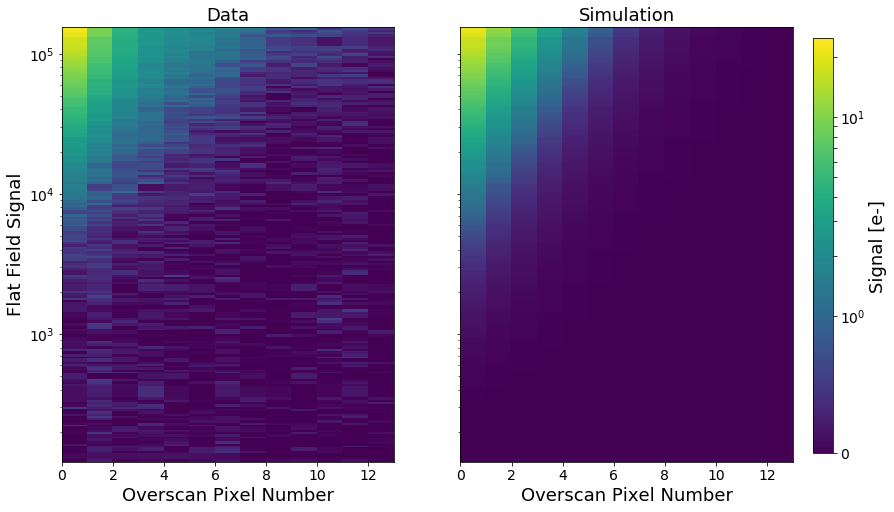

In [16]:
infile = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6790D_linearity/R20/S02/R20_S02_overscan_results.fits'
hdulist = fits.open(infile)
max_signal = 160000.
error = 7.2/np.sqrt(2000.)

amp = 2
start = 2
stop = 15

## Signals
all_signals = hdulist[amp].data['FLATFIELD_SIGNAL']
signals = all_signals[all_signals<max_signal]

## Data
data = hdulist[amp].data['COLUMN_MEAN'][all_signals<max_signal, start:stop+1]

params = Parameters()
params.add('ctiexp', value=-6, min=-7, max=-5, vary=True)
params.add('trapsize', value=0.0, min=0., max=10., vary=False)
params.add('scaling', value=0.08, min=0, max=1.0, vary=False)
params.add('emissiontime', value=0.4, min=0.1, max=1.0, vary=False)
params.add('driftscale', value=0.0006, min=0., max=0.001)
params.add('decaytime', value=1.5, min=0.1, max=4.0)
params.add('threshold', value=5000.0, min=0.0, max=150000.)

model = SimpleModel()

minner = Minimizer(model.difference, params, fcn_args=(signals, data, error, num_transfers),
                   fcn_kws={'start' : start, 'stop' : stop})
result = minner.minimize()

print(result.params)
res = SimpleModel.model_results(result.params,signals, num_transfers, start=start, stop=stop)

## Setting up PColor plot
vmin = 0.0
vmax = np.max(data)
y=signals
x=np.arange(data.shape[1])
X,Y=np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
im0 = axes[0].pcolor(X, Y, data, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
im1 = axes[1].pcolor(X, Y, res, 
                     norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
axes[0].set_yscale('log')
axes[0].set_ylabel('Flat Field Signal', fontsize=18)
axes[0].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_title('Data', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Overscan Pixel Number', fontsize=18)
axes[1].set_title('Simulation', fontsize=18)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.14, 0.02, 0.72])
cbar= fig.colorbar(im0, cax=cbar_ax)
cbar.set_label('Signal [e-]', fontsize=18)
cbar.ax.tick_params(labelsize=14)

## Best Way to Fit Electronics

In [5]:
infile = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6790D_linearity/R20/S02/R20_S02_overscan_results.fits'
hdulist = fits.open(infile)
max_signal = 160000.
error = 7.2/np.sqrt(2000.)

start = 2
stop = 20

for amp in range(1, 17):

    ## Signals
    all_signals = hdulist[amp].data['FLATFIELD_SIGNAL']
    signals = all_signals[all_signals<max_signal]

    ## Data
    data = hdulist[amp].data['COLUMN_MEAN'][all_signals<max_signal, start:stop+1]

    params = Parameters()
    params.add('ctiexp', value=-6, min=-7, max=-5, vary=False)
    params.add('trapsize', value=0.0, min=0., max=10., vary=False)
    params.add('scaling', value=0.08, min=0, max=1.0, vary=False)
    params.add('emissiontime', value=0.4, min=0.1, max=1.0, vary=False)
    params.add('driftscale', value=0.0006, min=0., max=0.001)
    params.add('decaytime', value=1.5, min=0.1, max=4.0)
    params.add('threshold', value=5000.0, min=0.0, max=150000.)

    model = SimpleModel()

    minner = Minimizer(model.difference, params, fcn_args=(signals, data, error, num_transfers),
                       fcn_kws={'start' : start, 'stop' : stop})
    result = minner.minimize()
    print(amp)
    print(result.params)

1
Parameters([('ctiexp', <Parameter 'ctiexp', value=-6 (fixed), bounds=[-7:-5]>), ('trapsize', <Parameter 'trapsize', value=0.0 (fixed), bounds=[0.0:10.0]>), ('scaling', <Parameter 'scaling', value=0.08 (fixed), bounds=[0:1.0]>), ('emissiontime', <Parameter 'emissiontime', value=0.4 (fixed), bounds=[0.1:1.0]>), ('driftscale', <Parameter 'driftscale', value=0.0004733052196407918 +/- 4.94e-06, bounds=[0.0:0.001]>), ('decaytime', <Parameter 'decaytime', value=1.6336048768721478 +/- 0.0108, bounds=[0.1:4.0]>), ('threshold', <Parameter 'threshold', value=3.5947911314337944e-07 +/- 60.6, bounds=[0.0:150000.0]>)])
2
Parameters([('ctiexp', <Parameter 'ctiexp', value=-6 (fixed), bounds=[-7:-5]>), ('trapsize', <Parameter 'trapsize', value=0.0 (fixed), bounds=[0.0:10.0]>), ('scaling', <Parameter 'scaling', value=0.08 (fixed), bounds=[0:1.0]>), ('emissiontime', <Parameter 'emissiontime', value=0.4 (fixed), bounds=[0.1:1.0]>), ('driftscale', <Parameter 'driftscale', value=0.0005051608525081176 +/- 

15
Parameters([('ctiexp', <Parameter 'ctiexp', value=-6 (fixed), bounds=[-7:-5]>), ('trapsize', <Parameter 'trapsize', value=0.0 (fixed), bounds=[0.0:10.0]>), ('scaling', <Parameter 'scaling', value=0.08 (fixed), bounds=[0:1.0]>), ('emissiontime', <Parameter 'emissiontime', value=0.4 (fixed), bounds=[0.1:1.0]>), ('driftscale', <Parameter 'driftscale', value=0.0005588889138576879 +/- 6.31e-06, bounds=[0.0:0.001]>), ('decaytime', <Parameter 'decaytime', value=1.4820840181181498 +/- 0.00994, bounds=[0.1:4.0]>), ('threshold', <Parameter 'threshold', value=389.46922433810147 +/- 173, bounds=[0.0:150000.0]>)])
16
Parameters([('ctiexp', <Parameter 'ctiexp', value=-6 (fixed), bounds=[-7:-5]>), ('trapsize', <Parameter 'trapsize', value=0.0 (fixed), bounds=[0.0:10.0]>), ('scaling', <Parameter 'scaling', value=0.08 (fixed), bounds=[0:1.0]>), ('emissiontime', <Parameter 'emissiontime', value=0.4 (fixed), bounds=[0.1:1.0]>), ('driftscale', <Parameter 'driftscale', value=0.0005135587344933439 +/- 5.